In [1]:
import numpy as np
import control
from l1_adaptive_controller import L1_adapt
import matplotlib.pyplot as plt
import gym
import gym_cartpole_continuous

In [7]:
def f(x):
    Am = np.array([[0, 1, 0, 0], [0, 0, -0.98, 0],
                    [0, 0, 0, 1], [0, 0, 21.56, 0]])
    return np.matmul(Am, x)


def g(x):
    Bm = np.array([[0, 1, 0, -2]]).T
    return Bm

def lqr_policy(observation):

    # cost function

    Q = np.identity(4)
    R = np.identity(1)

    # linearization
    #A = np.identity(4)
    rn = np.random.normal(0, 1)
    A = np.array([[0, 1, 0, 0], [0, 0, -0.98, 0],
                 [0, 0, 0, 1], [0, 0, 21.56, 0]])

    #B = np.ones((4,1))
    B = np.array([[0, 1, 0, -2]]).T

    K, S, E = control.lqr(A, B, Q, R)

    action = -1*np.dot(K, observation)

    if action >= 1:
        return np.array([1])
    elif action <= -1:
        return np.array([-1])
    else:
        return action

env = gym.make('CartPoleContinuous-v0')
M = float(env.masscart)
m = float(env.masspole)
l = float(env.length)
g = float(env.gravity)



adaptive_controller = L1_adapt(env,f,g)

observation=env.reset()

obs_list=[]
policy=[]
# m_uncertainty = []
# um_uncertainty_1 = []
# um_uncertainty_2 = []
# um_uncertainty_3 = []


for _ in range(2000):
    
    u_bl= lqr_policy(observation)

    # u =adaptive_controller.get_control_input(observation,u_bl)
    
    observation=adaptive_controller.plant(observation,u_bl)
    obs_list.append(observation[2])
    policy.append(u_bl.squeeze(0))




TypeError: 'float' object is not callable

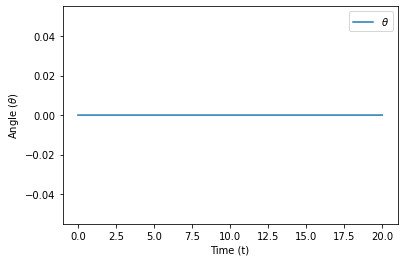

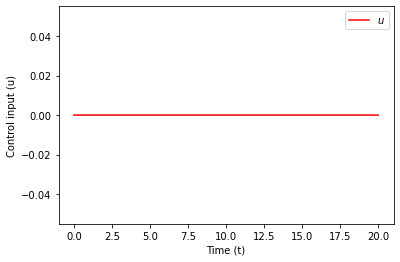

In [6]:
t = np.linspace(0,20,2000)
plt.plot(t,obs_list)
plt.xlabel('Time (t)')
plt.ylabel(r'Angle ($\theta$)')
plt.legend([r'$\theta$'])
plt.savefig('Trajectory_python.png', format = 'png')
plt.show()

plt.plot(t,policy,'r')
plt.xlabel('Time (t)')
plt.ylabel('Control input (u)')
plt.legend([r'$u$'])
plt.savefig('Control-input_python.png', format = 'png')
plt.show()